# Lab 8 Web Scraping

Skills
- download HTML
- parse HTML

New Modules
- requests
- os
- beautifulsoup

Special Note
For those of you running Python 3.6 with OS X you may need to install certificates. Here is an explanation (https://stackoverflow.com/questions/27835619/urllib-and-ssl-certificate-verify-failed-error). Here are the commands:
> pip install certifi

> /Applications/Python\ 3.6/Install\ Certificates.command

In [1]:
# import modules
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re
import requests

import matplotlib.pyplot as plt
%matplotlib inline


# Part A: Downloading HTML

## Downloading Wikipedia Page UMD

In [5]:
# Using the requests library, get the wikipedia page for UMD
# HINT: https://en.wikipedia.org/wiki/University_of_Maryland,_College_Park
URL = 'https://en.wikipedia.org/wiki/University_of_Maryland,_College_Park'
page = requests.get(URL)
# print html response object
print(page)

<Response [200]>


In [6]:
# print response code only
page.status_code

200

In [8]:
# Print the headers
headers = page.headers
print(headers)

{'Date': 'Thu, 22 Apr 2021 14:50:54 GMT', 'Vary': 'Accept-Encoding,Cookie,Authorization', 'Server': 'ATS/8.0.8', 'X-Content-Type-Options': 'nosniff', 'P3p': 'CP="See https://en.wikipedia.org/wiki/Special:CentralAutoLogin/P3P for more info."', 'Content-Language': 'en', 'X-Request-Id': '08263e99-2c7c-49d0-b49e-57075e638436', 'Last-Modified': 'Wed, 21 Apr 2021 14:18:45 GMT', 'Content-Type': 'text/html; charset=UTF-8', 'Content-Encoding': 'gzip', 'Age': '1464', 'X-Cache': 'cp1081 hit, cp1081 hit/5', 'X-Cache-Status': 'hit-front', 'Server-Timing': 'cache;desc="hit-front", host;desc="cp1081"', 'Strict-Transport-Security': 'max-age=106384710; includeSubDomains; preload', 'Report-To': '{ "group": "wm_nel", "max_age": 86400, "endpoints": [{ "url": "https://intake-logging.wikimedia.org/v1/events?stream=w3c.reportingapi.network_error&schema_uri=/w3c/reportingapi/network_error/1.0.0" }] }', 'NEL': '{ "report_to": "wm_nel", "max_age": 86400, "failure_fraction": 0.05, "success_fraction": 0.0}', 'Per

In [10]:
# print first 500 characters of data in bytes
bytes(page.text[:500], 'utf-8')

b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>University of Maryland, College Park - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"08263e99-2c7c-49d0-'

In [15]:
# print the first 500 characters of the the html in unicode
page.text[:500]

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>University of Maryland, College Park - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"08263e99-2c7c-49d0-'

In [16]:
# Print the time elapsed. This is from the requests.Response Object
print(page.elapsed)

0:00:00.075840


In [17]:
# Print the Cookies. This is from the requests.Response Object
print(page.cookies)

<RequestsCookieJar[<Cookie GeoIP=US:MD:Frederick:39.36:-77.46:v4 for .wikipedia.org/>, <Cookie WMF-Last-Access-Global=22-Apr-2021 for .wikipedia.org/>, <Cookie WMF-Last-Access=22-Apr-2021 for en.wikipedia.org/>]>


## Downloading Invalid Website

In [19]:
# try to download html from https://en.wikipedia.org/lion and print out the status code
invalid = requests.get('https://en.wikipedia.org/lion')
print(invalid.status_code)

404


## Downloading Valid Website

In [20]:
# download html for another website of your choosing
mysite = requests.get('https://www.discogs.com/Masayoshi-Takanaka-The-Rainbow-Goblins/master/392507')



In [23]:
# print the first 500 characters of the html
print(mysite.text[:500])

<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en-US"> <![endif]-->
<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en-US"> <![endif]-->
<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en-US"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-US"> <!--<![endif]-->
<head>

<title>Attention Required! | Cloudflare</title>

<meta name="captcha-bypass" id="captcha-bypass" />
<meta charset="UTF-8" />
<meta http-equiv="Content-Type" content="text/html; 


## Downloading Weather Data 

In [24]:
# open url for darksky for college park or any zip code of your choosing: https://darksky.net/zipcode/20742/us12/en
url = "https://darksky.net/zipcode/20742/us12/en"

weather = requests.get(url)


In [25]:
# print the first 500 characters of the html
print(weather.text[:500])


<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8" lang="en">
  <meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1.0">
  <meta name="apple-itunes-app" content="app-id=517329357, affiliate-data=darkskynet">
  <meta name="google-play-app" content="app-id=net.darksky.darksky">

  <meta name="description" content="Dark Sky is the most accurate source of hyperlocal weather information for College Park, MD: with down-to-the-minute forecasts for your exact 


In [32]:
# save html to file
# HINT: look up how to write a file if you forget (https://www.w3schools.com/python/python_file_write.asp)
f = open("weatherfile.txt", "w")
f.write(weather.text[:600])
f.close()

# Part B: Beautiful Soup

## Practice using beautiful soup

In [34]:
# example html
html = """<!DOCTYPE html>
            <html>
            <head>
            <title>INST447 Lab 8</title>
            </head>
            <body>

            <h1>This is a Heading</h1>
            <p class="firstpara">This is first paragraph.</p>
            <p>This is second paragraph.</p>
            <p id="third">This is third paragraph. <h1>Header tag in third paragraph</h1>
                 <p id="fourth">Fourth paragraph</p>
            </p>

            </body>
            </html>
        """

In [36]:
# convert into beautiful soup
soup = BeautifulSoup(html, 'html.parser')
# print beautifulsoup object
print(soup)

<!DOCTYPE html>

<html>
<head>
<title>INST447 Lab 8</title>
</head>
<body>
<h1>This is a Heading</h1>
<p class="firstpara">This is first paragraph.</p>
<p>This is second paragraph.</p>
<p id="third">This is third paragraph. <h1>Header tag in third paragraph</h1>
<p id="fourth">Fourth paragraph</p>
</p>
</body>
</html>



In [39]:
# Find the <p> tag with an id="third" and print it
element = soup.find('p', id="third")
print(element.getText())

# Find the children of the <p> tag with an id="third" and print them if they exist
element = soup.find('p', id="fourth")
print(element.getText())

This is third paragraph. Header tag in third paragraph
Fourth paragraph

Fourth paragraph


In [40]:
# use find to get the title
element = soup.find("title")

# get the text within the title tags and print
print(element.getText())

INST447 Lab 8


In [43]:
# use findAll to get the heading 'h1' and print
elements = soup.findAll("h1")
for i in elements:
    print(i.getText())

This is a Heading
Header tag in third paragraph


In [44]:
# use findall to get all of the paragraphs and print
elements = soup.findAll("p")
for i in elements:
    print(i.getText())

This is first paragraph.
This is second paragraph.
This is third paragraph. Header tag in third paragraph
Fourth paragraph

Fourth paragraph


In [45]:
# Final all <p> tags with a class of "firstpara" and print them
elements = soup.findAll("p", {'class' : "firstpara"})
for i in elements:
    print(i.getText())

This is first paragraph.


## Using beautiful soup to get weather data

In [48]:
# read in html from weather site. We are using a local file due to the fact that the site
#   changes. This file keeps the assessment the same.
f = open("/Users/zacfo/Downloads/WeatherInfo.txt","r", encoding='utf-8')
html = f.read()

#print html
print(html[:500])

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8" lang="en">
  <meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1.0">
  <meta name="apple-itunes-app" content="app-id=517329357, affiliate-data=darkskynet">
  <meta name="google-play-app" content="app-id=net.darksky.darksky">

  <meta name="description" content="Dark Sky is the most accurate source of hyperlocal weather information for College Park, MD: with down-to-the-minute forecasts for your exact 


In [49]:
# convert into beautiful soup
soup = BeautifulSoup(html, 'html.parser')
# print beautifulsoup object
print(soup)

ref="/tos">Terms of Service</a></li>
<li><a href="/attribution">Attribution</a></li>
<li><a href="https://blog.darksky.net/">Blog</a></li>
<li><a href="/help">Help</a></li>
<li><a href="/contact">Contact</a></li>
<li><a href="/privacy">Privacy</a></li>
</ul>
</div>
</div>
<div class="copyright">
<span class="copyright">Copyright © 2020 <a href="https://apple.com">Apple Inc.</a> All rights reserved. </span>
</div>
</div>
<script>
                      var latitude = 38.9895,
                      longitude = -76.9456,
                      forecastTime = 1605276777,
                      tz_offset = -5,
                      units = "us",
                      language = "en",
                      timeFormat = "12",
                      languageReversed = false,
                      conditions = {"clear":"clear","light-clouds":"partly cloudy","heavy-clouds":"overcast","medium-rain":"rain","very-light-rain":"drizzle","light-rain":"light rain","heavy-rain":"heavy rain","medium-sleet":"

In [74]:
# Get and save elements that have the minimum temperature per day
# HINT: use element inspector on website notice span of class minTemp
minTemps = soup.findAll('span', {'class' : 'minTemp'})

# print the elements with minimum temperature
for i in minTemps:
    print(i.getText())

type(minTemps)

46˚
39˚
42˚
41˚
37˚
33˚
24˚
46˚


bs4.element.ResultSet

In [63]:
# Get and save elements that have the maximum temperature per day
# HINT: use element inspector on website notice span of class maxTemp
maxTemps = soup.findAll('span', {'class' : 'maxTemp'})

# print the elements with maximum temperature
for i in maxTemps:
    print(i.getText())

61˚
54˚
64˚
57˚
52˚
45˚
48˚
63˚


In [77]:
# use regular expressions to save the minimum temperatures 
mintempsnum = [re.search(str(span), "\d+") for span in minTemps]

# print these numbers
print(mintempsnum)

[None, None, None, None, None, None, None, None]


list

In [69]:
# use regular expressions to save the maximum temperatures
maxtempsnum = [re.search(str(span),"\d+") for span in maxTemps]
# print these numbers
print(maxtempsnum)

[None, None, None, None, None, None, None, None]


In [79]:
# create a data frame with minimum and maximum temperatures
d = {'minTemp':mintempsnum, 'maxTemp':maxtempsnum}
d
df = pd.DataFrame(d)
# print first rows of the data frame
print(df.head())

  minTemp maxTemp
0    None    None
1    None    None
2    None    None
3    None    None
4    None    None


<AxesSubplot:xlabel='minTemp', ylabel='maxTemp'>

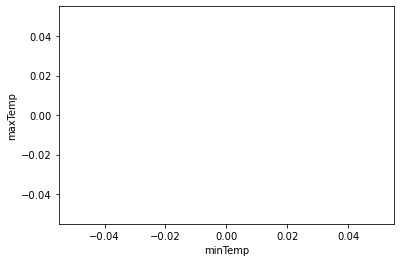

In [80]:
# create a scatterplot of the data 
df.plot.scatter(x='minTemp', y='maxTemp')